# Modern Portfolio Theory and Efficient Frontier

Modern Portfolio Theory is a framework developed by Harry Markowitz that aims to maximize expected portfolio returns for a given level of risk or minimize risk for a given level of expected returns. 

Key principles of Modern Portfolio Theory include Diversification, Risk-Return Trade-off, Mean-Variance Optimization, CAPM and Efficient Frontier.

The application of Modern Portfolio Theory involves analyzing historical data, estimating expected returns and volatilities, and considering investor preferences for risk and return.

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings 
warnings.filterwarnings('ignore')

In [4]:
start = datetime(2015,1,1)
end = datetime.now()

tickers = ['CAP.PA', 'WLN.PA', 'BNP.PA', 'GLE.PA', 'ACA.PA']
data = pdr.get_data_yahoo(tickers, start, end)
df = data.copy()
df = df.loc[:, 'Adj Close']
df

[*********************100%***********************]  5 of 5 completed


,ACA.PA,BNP.PA,CAP.PA,GLE.PA,WLN.PA
Date,,,,,
2015-01-02,6.983820,28.721577,53.287468,20.165136,16.100000
2015-01-05,6.663463,27.327038,52.578384,19.264090,15.900000
2015-01-06,6.535319,26.612345,50.548645,18.921921,15.980000
2015-01-07,6.442416,26.167833,50.761368,18.719473,15.950000
2015-01-08,6.599391,27.016172,52.206120,19.264090,16.049999
...,...,...,...,...,...
2023-05-15,11.678000,54.818848,162.550003,22.275000,39.830002
2023-05-16,11.728000,54.622532,160.699997,22.080000,39.750000
2023-05-17,11.694000,54.809502,158.800003,22.520000,40.400002


In [6]:
log_rtn = np.log(df/df.shift(1))
log_rtn = log_rtn.dropna()
log_rtn

,ACA.PA,BNP.PA,CAP.PA,GLE.PA,WLN.PA
Date,,,,,
2015-01-05,-0.046957,-0.049772,-0.013396,-0.045712,-0.012500
2015-01-06,-0.019418,-0.026501,-0.039369,-0.017922,0.005019
2015-01-07,-0.014318,-0.016844,0.004199,-0.010757,-0.001879
2015-01-08,0.024074,0.031905,0.028064,0.028678,0.006250
2015-01-09,-0.023080,-0.034128,0.006093,-0.011313,-0.003120
...,...,...,...,...,...
2023-05-15,-0.003419,0.002561,-0.004910,0.009699,0.007561
2023-05-16,0.004272,-0.003588,-0.011446,-0.008793,-0.002011
2023-05-17,-0.002903,0.003417,-0.011894,0.019732,0.016220


In [9]:
iters = 3000

rtn_arr = np.zeros(iters)
vol_arr = np.zeros(iters)
sr_arr = np.zeros(iters)
wt_arr = np.zeros((iters, len(df.columns)))

for i in range(iters):
    w = np.random.random(len(df.columns))
    w = w/np.sum(w)
    wt_arr[i,:] = w
    rtn_arr[i] = np.sum(log_rtn.mean()*252*w)
    vol_arr[i] = np.sqrt(np.dot(w.T, np.dot(log_rtn.cov()*252, w)))
    sr_arr[i] = rtn_arr[i]/vol_arr[i]

In [10]:
res = sr_arr.max()

Text(0.5, 1.0, 'Maxt Sharpe Ratio is observed as value: 0.44908344716029047')

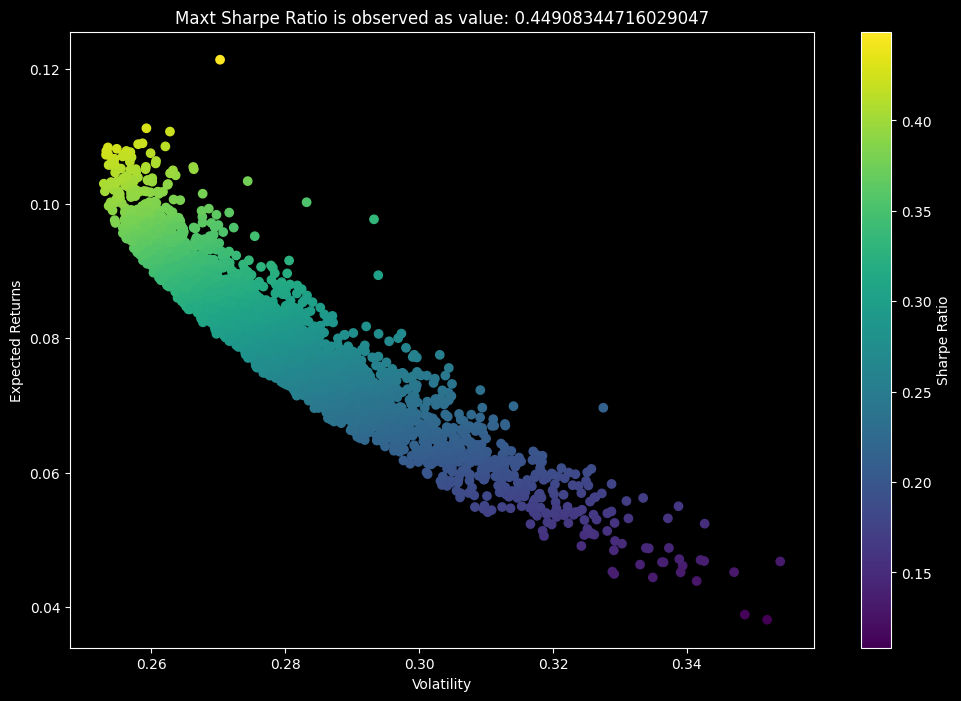

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, rtn_arr, c=sr_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title(f'Max Sharpe Ratio is observed as value: {res}')